#Train model with different optimisers (Adam & SGD)

1. Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

2. Loading the MNIST dataset from tensorflow (x_train, x_test, y_train, y_test)
3. The grayscale images in the MNIST dataset have pixel values ranging from 0 to 255 (8 bit representation), Neural networks perform better when the inpute values scaled to a smaller range (between 0 to 1).
Dividing by 255.0 scales the values to [0, 1], making the training process more stable (avaoding large weight updates), faster convergence (since values are in a small and manageable range), helps avoid issues elated to exploding or vanishing gradients.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


4. create_model() function creates and returns a tensorflow sequential mode.
i) sequential() to create a stack of layer where each layers output serves as an input to the next layer
ii) Flatten() to convert 2D image(28*28) into a 1D vector(784,)
iii) first hiddeen layer with 128 neurons, and relu activation function which helps in introducing non-linearity nd helping the network to learn complex patterns.
5. using create_model() function to reuse the same code for building independent models

In [3]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

6. Compiling the model ADAM(Adaptive moment estimation), sparse_categorical_crossentropy (best when lables are integers instead of one hot encoded values), accuracy (tracks model performance during training)

In [4]:
model_adam = create_model()
model_adam.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7. Compiling the model SGD(stochastic gradient descent) genreally used for large-scale machine learning problems often encountered in text classification and natural language processing, sparse_categorical_crossentropy (best when lables are integers instead of one hot encoded values), accuracy (tracks model performance during training)

In [5]:
model_sgd = create_model()
model_sgd.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

8. for simple datasets like MNIST, 5 epoch is usually sufficient for achieving a good accuracy (>90%), and verbose 2 is to display one line per epoch

In [6]:
epochs = 5
history_adam = model_adam.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)
history_sgd = model_sgd.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)

Epoch 1/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9126 - loss: 0.2987 - val_accuracy: 0.9575 - val_loss: 0.1398
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9575 - loss: 0.1420 - val_accuracy: 0.9676 - val_loss: 0.1055
Epoch 3/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9669 - loss: 0.1087 - val_accuracy: 0.9737 - val_loss: 0.0874
Epoch 4/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9729 - loss: 0.0869 - val_accuracy: 0.9759 - val_loss: 0.0773
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9762 - loss: 0.0759 - val_accuracy: 0.9774 - val_loss: 0.0719
Epoch 1/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8063 - loss: 0.7100 - val_accuracy: 0.9019 - val_loss: 0.3600
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8930 - loss: 0.3788 - val_accuracy: 0.9193 - val_loss: 0.2892
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9081 - loss: 0.3192 - val_accuracy: 0.9299 - val_loss: 0.2525
Epoch 4/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9201 - loss: 0.2825 - val_accuracy: 0.9359 - val_los

9. Plotting the learning curve for both adam and sgd model using matplotlib library.

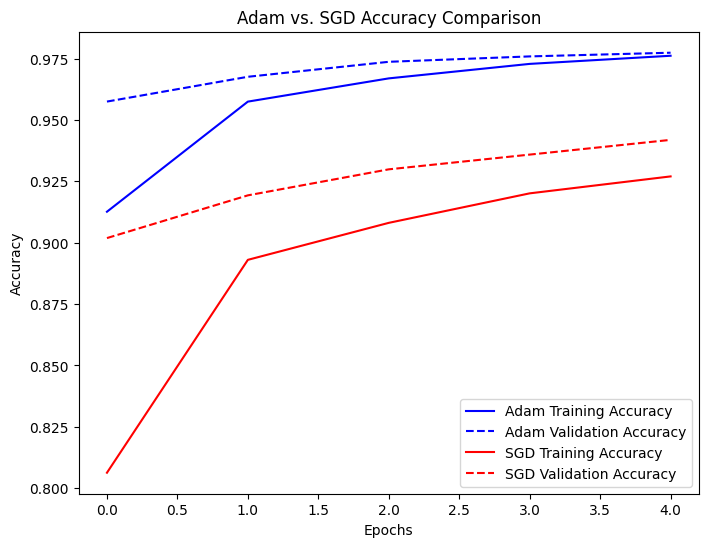

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy', linestyle='dashed', color='blue')
plt.plot(history_sgd.history['accuracy'], label='SGD Training Accuracy', color='red')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation Accuracy', linestyle='dashed', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Adam vs. SGD Accuracy Comparison')
plt.show()

10. Printitng test loss and accuracy for both adam and sgd models

In [8]:
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test, verbose=2)
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9774 - loss: 0.0719
313/313 - 1s - 2ms/step - accuracy: 0.9419 - loss: 0.2057


In [9]:
print(f"Adam Test Accuracy: {test_acc_adam:.4f}")
print(f"SGD Test Accuracy: {test_acc_sgd:.4f}")

Adam Test Accuracy: 0.9774
SGD Test Accuracy: 0.9419


Observations:

*   Adam achieves faster convergence due to adaptive learning rates, while SGD requires more epochs to reach similar accuracy.
*   Training accuracy fluctuates more with SGD, whereas Adam provides smoother learning curves.
*   Validation accuracy with Adam is generally higher, indicating better generalization.
*   SGD may overfit less but needs tuning (learning rate scheduling) for better performance.
*   Adam is preferred for efficient and stable training, while SGD is useful for controlled, steady updates in larger datasets.





